In [1]:
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols, latex, S
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Кривые второго порядка на плоскости: парабола

### Задание 1
Определить класс Parabola.

Внутренние переменные $\_p$, $\_vertex$, $\_angle$.

Реализовать **атрибуты**:

**параметр** $p$

**вершина** (vertex) в виде точки Point

**фокус** (focus) в виде точки Point

**угол angle** по умолчанию 0 для параболы с осью, параллельной OX, и ветвями, направленными вправо

**ось симметрии** (axis_symmetry) в виде прямой Line

**директриса** (directrix) в виде прямой Line

Реализовать **методы**

**equation(self)** - уравнение параболы,

**dir_equation(self)** - уравнение директрисы,

**ax_sym_equation(self**) - уравнение оси симметрии,

**rotate(self, angle)** - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой.

В конструкторе экземпляра класса  

\_\_new\_\_(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [2]:
class Parabola(GeometrySet):
    def __new__(cls, p, vertex=None, angle=None, **kwargs):
        if vertex is None:
            vertex = Point(0, 0)
        else:
            if len(vertex) != 2:
                raise ValueError('The vertex of "{}" must be a two dimensional point'.format(cls))
            vertex = Point(vertex, dim=2)
        return GeometryEntity.__new__(cls, p, vertex, angle, **kwargs)

    def __init__(self, _p, _vertex, _angle=0):
        self._p = _p
        self._vertex = _vertex
        self._angle = _angle

    @property
    def p(self) -> int:
        return self._p

    @property
    def vertex(self) -> Point2D:
        return Point(self._vertex[0], self._vertex[1])

    @property
    def focus(self):
        x0, y0 = self.vertex
        if self._angle == None:
            alpha = 0
        else:
            alpha = self._angle
        return Point(x0 + Cos(alpha) * self._p / 2, y0 + Sin(alpha) * self._p / 2)

    @property
    def angle(self):
        if self._angle == None:
            self._angle = 0
        return self._angle

    @property
    def axis_symmetry(self):
        return Line(self.focus, self.vertex)

    @property
    def directrix(self):
        x0, y0 = self.vertex
        P = Point(x0 - Cos(self._angle)*self._p/2, y0 - Sin(self._angle)*self._p/2)
        return (self.axis_symmetry).perpendicular_line(P)

    def rot_matr(self, angle):
        return Matrix([[Cos(angle), - Sin(angle)], [Sin(angle), Cos(angle)]])

    def equation(self):
        from sympy.abc import x, y
        sin_a = Sin(self.angle)
        cos_a = Cos(self.angle)
        A1 = Matrix([[cos_a, sin_a],
                    [-sin_a, cos_a]])
        x0, y0 = self.vertex
        X = A1 * Matrix((x - x0, y - y0))
        eq6 = Eq((X[1]) ** 2, 2 * self.p * (X[0]))

        return eq6


    def dir_equation(self):
        x, y = symbols('x y')
        x1, y1 = self.directrix.p1
        x2, y2 = self.directrix.p2

        return Eq((x - x1) * (y2 - y1), (y - y1) * (x2 - x1)).simplify()


    def ax_sym_equation(self):
        x, y = symbols('x y')
        x1, y1 = self.axis_symmetry.p1
        x2, y2 = self.axis_symmetry.p2

        return Eq((x - x1) * (y2 - y1), (y - y1) * (x2 - x1)).simplify()

    def rotate(self, angle):
        return Parabola(self._p, self._vertex, self._angle + angle)

### Задание 2
Построить параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы.

Изобразить на общем графике параболу, ее ось симметрии и директрису, парабола зеленая, ось симметрии красная, директриса черная.

3

Point2D(-5, 2)

pi/4

Point2D(-5 + 3*sqrt(2)/4, 3*sqrt(2)/4 + 2)

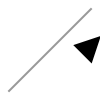

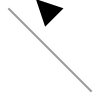

Eq((-sqrt(2)*(x + 5)/2 + sqrt(2)*(y - 2)/2)**2, 3*sqrt(2)*(x + 5) + 3*sqrt(2)*(y - 2))

Eq(x - y, -7)

Eq(x + y, 2*sqrt(2)*(-9*sqrt(2)/4 - 9/4)/3)

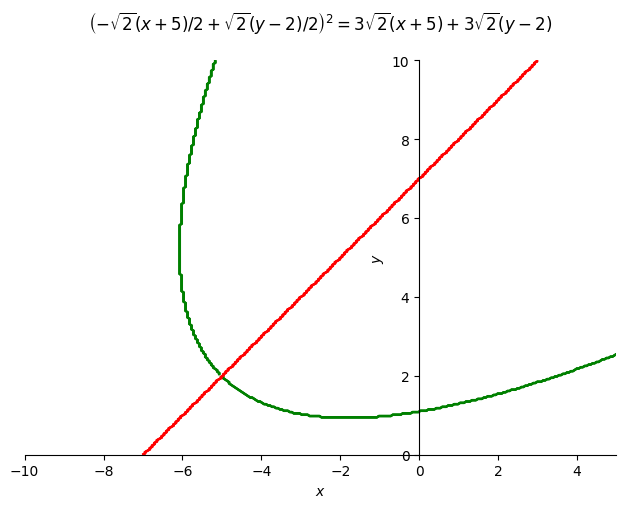

In [4]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

par = Parabola(3, (-5, 2), Pi/4)
display(par.p, par.vertex, par.angle, par.focus, par.axis_symmetry,
        par.directrix, par.equation(), par.ax_sym_equation(), par.dir_equation())

eq = par.equation()
eq_directrix = par.dir_equation()
eq_axis_symmetry = par.ax_sym_equation()

p0 = plot_implicit(eq, (x, -10, 5), (y, 0, 10), line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$',
                   title=f'{latex(eq, mode="inline")}\n',
                   adaptive=False, show=False)

p0.extend(plot_implicit(eq_directrix, (x, -10, 8), (y, 0, 10), line_color='w',
                       aspect_ratio=(1, 1), adaptive=False, show=False))
p0.extend(plot_implicit(eq_axis_symmetry, (x, -10, 8), (y, 0, 10), line_color='red',
                       aspect_ratio=(1, 1), adaptive=False, show=False))

p0.show()

### Индивидуальное задание
Построить параболу $x^{2} = 2py$ с $p = 5$, построить другую параболу путем поворота исходной параболы  на угол $\alpha = \pi/5$ радиан. Вывести на экран вершину, угол, фокус, ось симметрии и директрису обеих парабол.

Использовать уравнения повернутой параболы, ее оси симметрии и директрисы для построения графиков в одной координатной плоскости. Парабола фиолетовая, ось симметрии зеленая, директриса черная, название графика Парабола, подписи осей $x$ и $y$.

Вариант N 175

Центр $\operatorname{Point2D}\left(-1, 4\right)$, парабола вида $x^{2} = 2py$ с $p = 8$. Угол поворота $3 \pi / 4$.


<IPython.core.display.Latex object>

8

Point2D(-1, 4)

pi/2

Point2D(-1, 8)

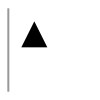

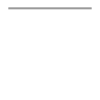

Eq((-x - 1)**2, 16*y - 64)

Eq(x, -1)

Eq(y, 0)

<IPython.core.display.Latex object>

8

Point2D(-1, 4)

5*pi/4

Point2D(-2*sqrt(2) - 1, 4 - 2*sqrt(2))

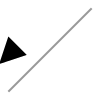

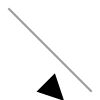

Eq((sqrt(2)*(x + 1)/2 - sqrt(2)*(y - 4)/2)**2, -8*sqrt(2)*(x + 1) - 8*sqrt(2)*(y - 4))

Eq(x - y, -sqrt(2)*(2*sqrt(2) - 2*sqrt(2)*(-4 + 2*sqrt(2)) + 8)/4)

Eq(x + y, sqrt(2)*(-2*sqrt(2) + 8 + 2*sqrt(2)*(2*sqrt(2) + 4))/4)

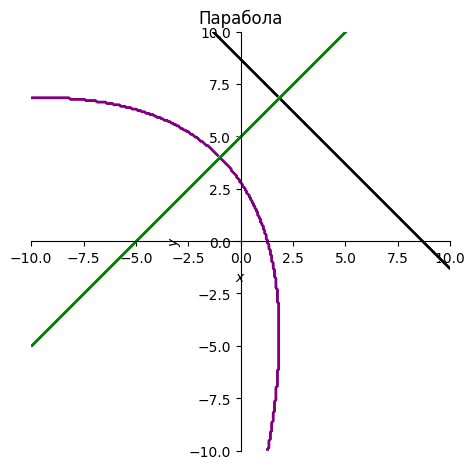

In [6]:
par = Parabola(8, (-1, 4), Pi / 2)
display(Latex(fr"$\text{{Исходная парабола:}}$"))
display(par.p, par.vertex, par.angle, par.focus, par.axis_symmetry,
        par.directrix, par.equation(), par.ax_sym_equation(), par.dir_equation())

par_new = par.rotate(3 * Pi / 4)

display(Latex(fr"$\text{{Новая парабола:}}$"))
display(par_new.p, par_new.vertex, par_new.angle, par_new.focus, par_new.axis_symmetry,
        par_new.directrix, par_new.equation(), par_new.ax_sym_equation(), par_new.dir_equation())

eq = par_new.equation()
eq_directrix = par_new.dir_equation()
eq_axis_symmetry = par_new.ax_sym_equation()

p0 = plot_implicit(eq, (x, -10, 10), (y, -10, 10), line_color='purple', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$',
                   title='Парабола',
                   adaptive=False, show=False)

p0.extend(plot_implicit(eq_directrix, (x, -10, 10), (y, -10, 10), line_color='black',
                       aspect_ratio=(1, 1), adaptive=False, show=False))
p0.extend(plot_implicit(eq_axis_symmetry, (x, -10, 10), (y, -10, 10), line_color='green',
                       aspect_ratio=(1, 1), adaptive=False, show=False))

p0.show()